In [1]:
import mne
import matplotlib.pyplot as plt
from nilearn.masking import apply_mask, compute_epi_mask
import numpy as np

import sys
sys.path.append("..")

from utils import eeg_utils, fmri_utils, data_utils, viz_utils

path_eeg = '/home/david/eeg_to_fmri/datasets/'

dataset = '01/fMRI/'

individual = '35/'


fmri_file = '3_nw_mepi_rest_with_cross.nii.gz'

complete_path = path_eeg + dataset + individual + fmri_file

In [2]:
from nilearn.image import load_img, resample_img

img = load_img(complete_path)

In [3]:
img.affine

original_shape = img.shape[:-1]
print(original_shape)

downsample_factor = 5
downsampled_shape = (int(original_shape[0]/downsample_factor),
                    int(original_shape[1]/downsample_factor),
                    int(original_shape[2]/downsample_factor))

new_img = resample_img(img, target_affine=img.affine, target_shape=downsampled_shape)

new_img.shape

(64, 64, 30)


/home/david/.conda/envs/fmri_eeg/lib/python3.6/site-packages/nilearn/image/resampling.py:513: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


(12, 12, 6, 300)

In [27]:
resampling_factor=1

import os
from os import listdir
from os.path import isfile, join, isdir

from nilearn import image




individuals_imgs = get_individuals_paths_02(path_fmri=fmri_utils.dataset_path+"/datasets/tmp_02/", number_individuals=14)
#individuals_imgs = fmri_utils.get_individuals_paths(resolution_factor=resampling_factor)

(170, 26215)


NameError: name 'fmri_scalers' is not defined

/home/david/.conda/envs/fmri_eeg/lib/python3.6/site-packages/nilearn/reporting/html_document.py:60: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  MAX_IMG_VIEWS_BEFORE_WARNING))



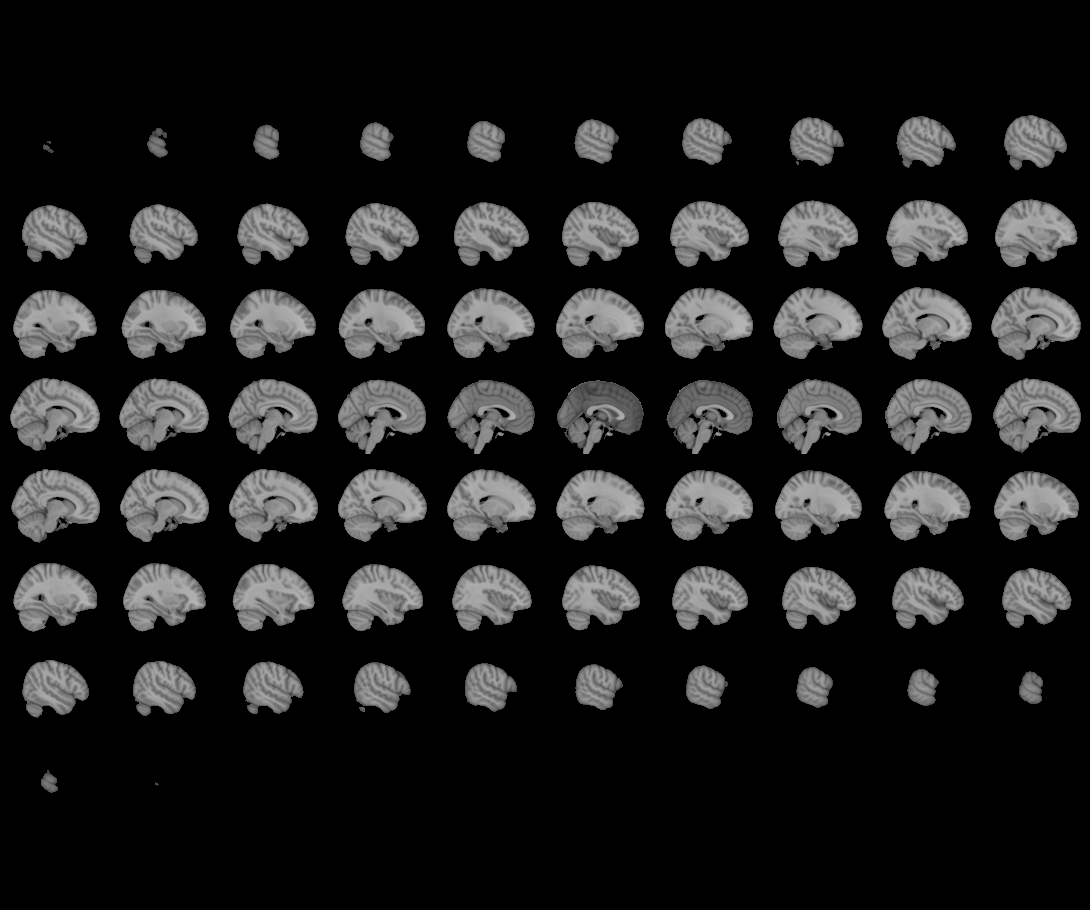
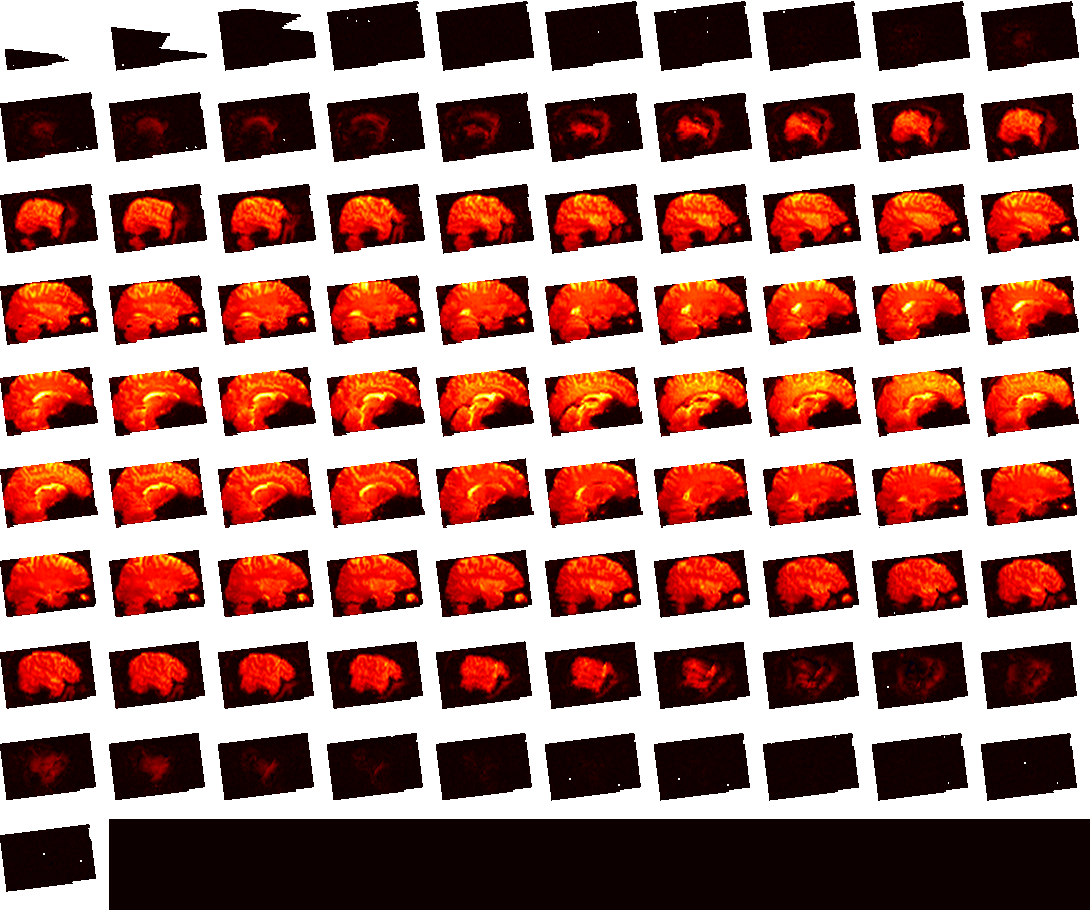

In [38]:
from nilearn import plotting

plotting.view_img(image.index_img(individuals_imgs[10], 0))

In [20]:
viz_utils.plot_view_mask(individuals_imgs[0], 
          timestep=4, 
          resampling_factor=resampling_factor,
          save_file="02_dataset.html")

/home/david/.conda/envs/fmri_eeg/lib/python3.6/site-packages/nilearn/reporting/html_document.py:60: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  MAX_IMG_VIEWS_BEFORE_WARNING))


In [4]:
#Load Data
eeg_train, bold_train, mask, scalers = data_utils.get_data_01(list(range(0, 10)),
                                n_voxels=None, bold_shift=3, n_partitions=24, 
                                by_partitions=False, partition_length=14,
                                f_resample=1.8, fmri_resolution_factor=1)

../utils/eeg_utils.py:40: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  return mne.io.read_raw_brainvision(complete_path, preload=True, verbose=0)
../utils/eeg_utils.py:40: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  return mne.io.read_raw_brainvision(complete_path, preload=True, verbose=0)
../utils/eeg_utils.py:40: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  return mne.io.read_raw_brainvision(complete_path, preload=True, verbose=0)
../utils/eeg_utils.py:40: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  return mne.io.read_raw_brainvision(complete_pat

(250, 64, 111, 14)
(250, 24576, 14)


In [5]:
plotting.plot_roi(mask.mask_img_, bg_img=None)
plotting.show()

NameError: name 'plotting' is not defined

In [6]:
unscaled_bold_train = data_utils.inverse_set_scaler(bold_train, scalers, n_partitions=25)

In [7]:
nifti_images = fmri_utils.get_nifti_from_set(bold_train, mask.mask_img_)
unscaled_nifti_images = fmri_utils.get_nifti_from_set(unscaled_bold_train, mask.mask_img_)

In [8]:
viz_utils.plot_view_mask(nifti_images[20], 
          timestep=4, 
          resampling_factor=resampling_factor,
          save_file="plot_zscore.html")

viz_utils.plot_view_mask(unscaled_nifti_images[20], 
          timestep=4, 
          resampling_factor=resampling_factor,
          save_file="plot_unscaled.html")

In [ ]:
mask_img = compute_epi_mask(complete_path)

masked_data = apply_mask(complete_path, mask_img)

# masked_data shape is (timepoints, voxels). We can plot the first 150
# timepoints from two voxels



# And now plot a few of these
plt.figure(figsize=(7, 5))
plt.plot(masked_data[:, 5:6])
plt.xlabel('Time [TRs]', fontsize=16)
plt.ylabel('Intensity', fontsize=16)
plt.xlim(0, masked_data.shape[0])
plt.subplots_adjust(bottom=.12, top=.95, right=.95, left=.12)

plt.show()

In [6]:
import numpy as np

from nilearn import _utils

import nilearn.image as image
from nilearn.decomposition import CanICA
from nilearn.input_data import NiftiMasker

from nilearn.image import new_img_like

from nilearn.masking import _apply_mask_fmri

from nilearn.plotting import plot_stat_map

#when its a population of n individuals
#imgs=[complete_path_ind_1, complete_path_ind_2, ..., complete_path_ind_n]
def _apply_mask(imgs, mask_img):
    mask_img = _utils.check_niimg_3d(mask_img)
    
    mask_img = _utils.check_niimg_3d(mask_img)
    mask = mask_img.get_data()
    mask = _utils.as_ndarray(mask, dtype=bool)
    
    mask_img = new_img_like(mask_img, mask, mask_img.affine)
    
    return _apply_mask_fmri(imgs, mask_img, dtype='f', smoothing_fwhm=None, ensure_finite=True)


class roi_time_series:
    def __init__(self, canica=None):
        self.canica = None
        
    def _set_ICA(self, imgs, n_components=20, verbose=0):
        self.canica = CanICA(n_components=n_components, smoothing_fwhm=6.,
                memory="nilearn_cache", memory_level=2,
                threshold=3., verbose=verbose, random_state=0)
        self._fit_ICA(imgs)
        
    def _fit_ICA(self, imgs):
        self.canica.fit(imgs)
        
    def get_ROI_time_series(self, imgs, component=0, n_components=20, verbose=False):

        #smooth image
        fmri_original = image.load_img(imgs)
        fmri_img = image.smooth_img(fmri_original, fwhm=6)

        #perform ICA and get components
        if(self.canica == None):
            if(verbose):
                print("New ICA computation")
            self._set_ICA(fmri_img, n_components=n_components)

        components_img = self.canica.components_img_

        #build masker
        roi_masker = NiftiMasker(mask_img=image.index_img(components_img, component),
                            standardize=True,
                            memory="nilearn_cache",
                            smoothing_fwhm=8)

        return _apply_mask(imgs, roi_masker.mask_img)

In [66]:
roi_extraction.get_ROI_time_series(complete_path, component=0, n_components=30).shape

(300, 3147)

/home/david/anaconda3/envs/fmri_eeg/lib/python3.6/site-packages/nilearn/plotting/displays.py:591: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  facecolor=facecolor)


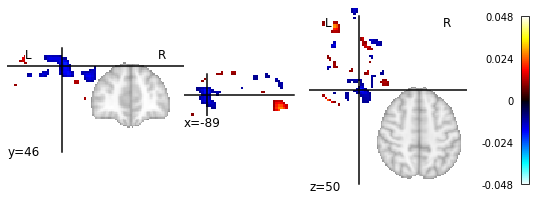

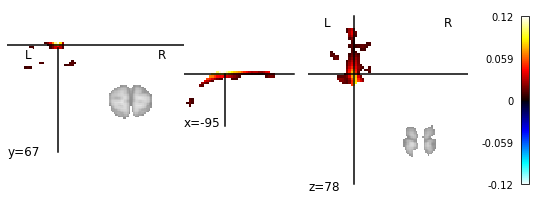

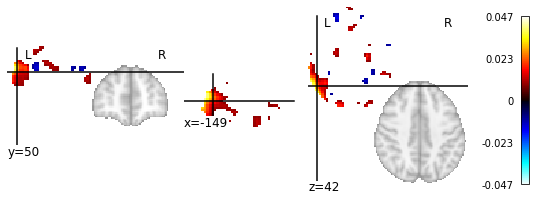

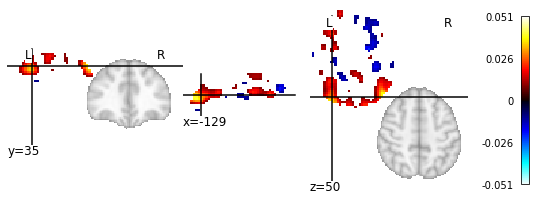

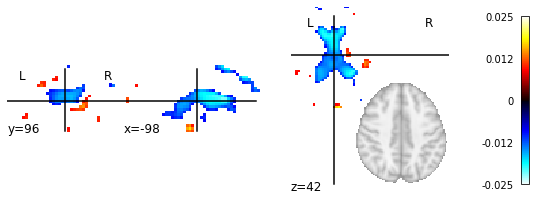

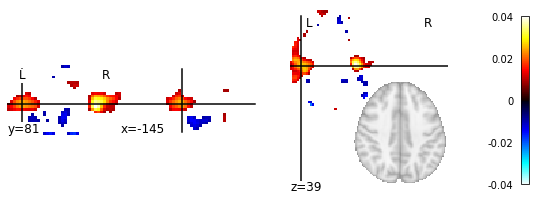

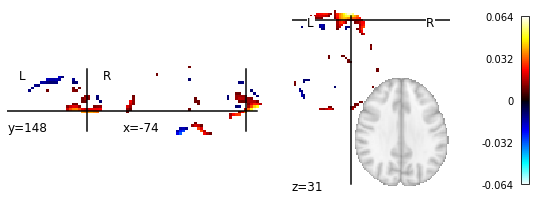

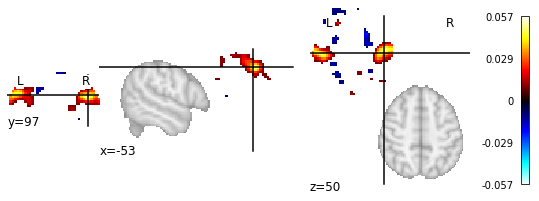

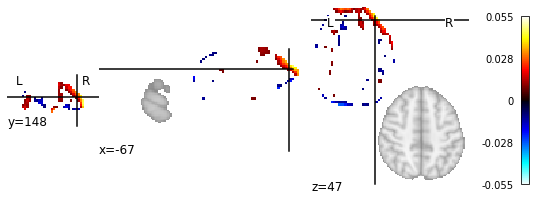

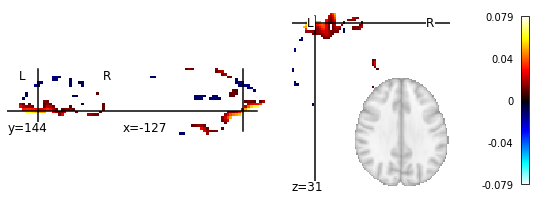

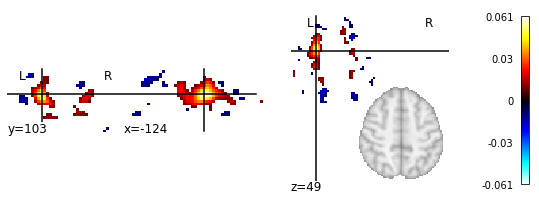

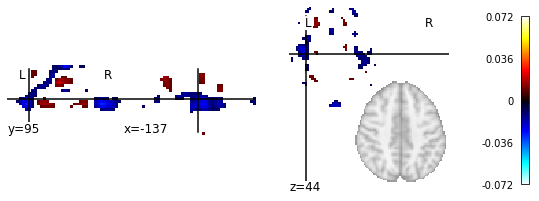

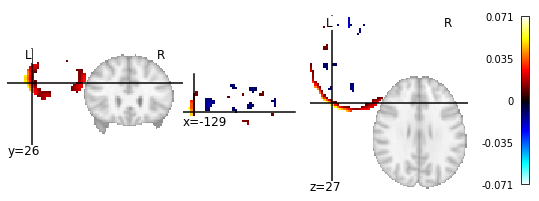

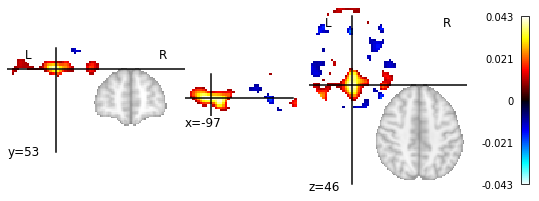

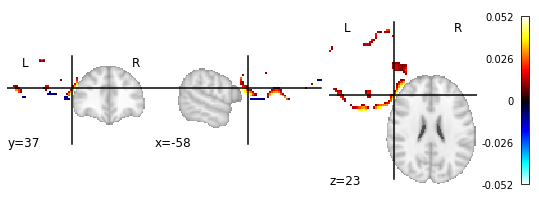

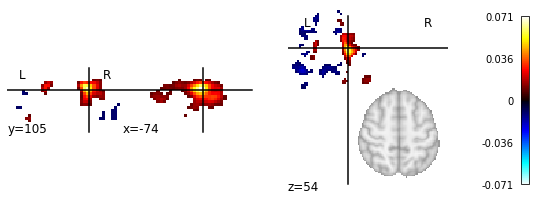

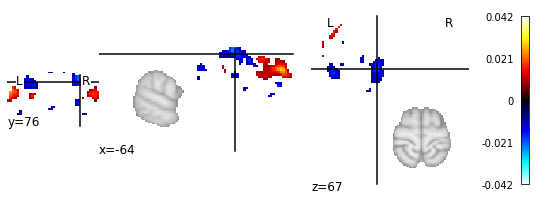

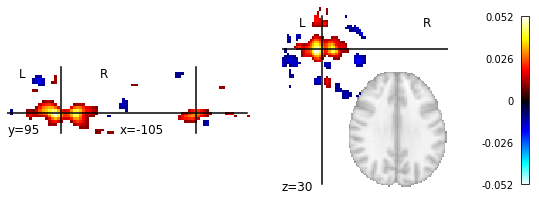

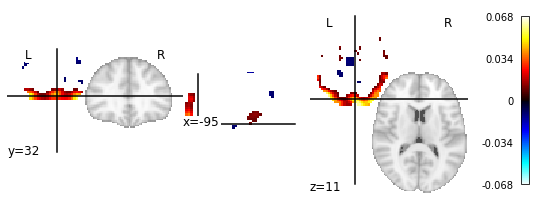

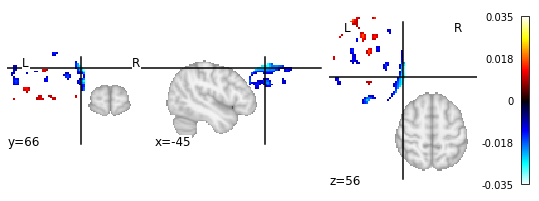

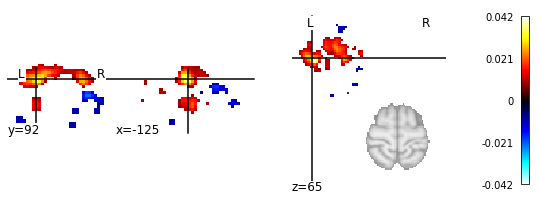

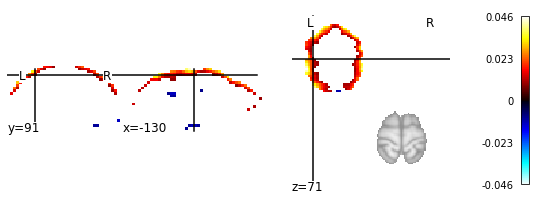

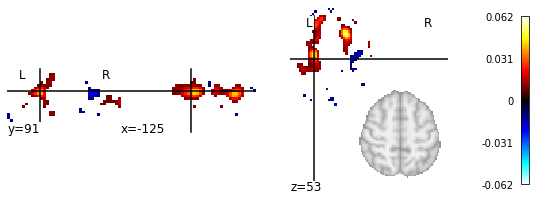

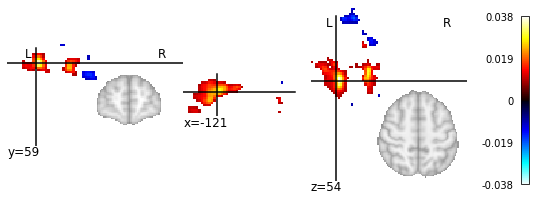

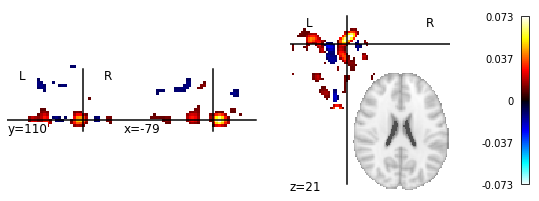

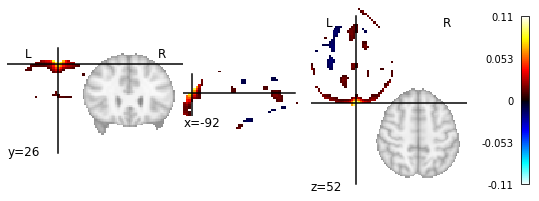

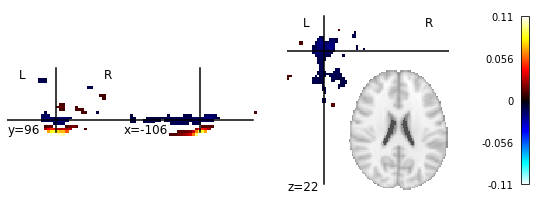

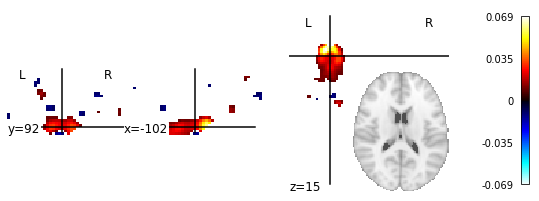

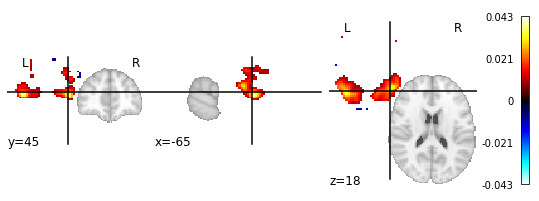

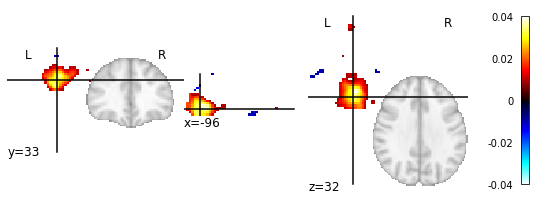

In [49]:
for component in range(components_img.shape[-1]):
    plot_stat_map(image.index_img(components_img, component))